In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# File name: inflation_plot.py
"""
Created on Thu Jun 28 00:05:20 2018

@author: Neo(liuniu@smail.nju.edu.cn)
"""

import matplotlib.pyplot as plt
import numpy as np
from numpy import cos, deg2rad, sqrt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# My modules
from error_inflation_progs import (error_inflation, pos_offset_wrms_soubinned, wrms_calc)

In [2]:
# Load data
datfile = ("../data/odd-even.cat_diff")
soulist = np.genfromtxt(datfile, usecols=(0,), dtype=str)
RA, Dec, dRAc, dDec, dRAc_err, dDec_err = np.genfromtxt(
    datfile, usecols=range(1, 7), unpack=True)
num_ses_mean, num_obs_mean = np.genfromtxt(
    datfile, dtype=int, usecols=range(7, 9), unpack=True)

In [3]:
# Calculate the offset and normalized seperation
rho = sqrt(dRAc**2 + dDec**2)
rho_err = sqrt(dRAc_err**2 + dDec_err**2)

# use a criteria "offset <= 1 mas" and "normalized seperation < 5" to remove outliers
con = (rho <= 1.) & (rho/rho_err <= 5.)

Decn = Dec[con]
dRAcn = dRAc[con]
dDecn = dDec[con]
dRAc_errn = dRAc_err[con]
dDec_errn = dDec_err[con]
num_ses_meann = num_ses_mean[con]

print("The decimation solutions have %d common sources, %d remain after removing outliers." 
      % (dRAc.size, dRAcn.size))

The decimation solutions have 2704 common sources, 1805 remain after removing outliers.


In [4]:
# Sort the data according to the number of sessions/observations
ind = np.argsort(num_ses_meann)
num_ses_sort = np.take(num_ses_meann, ind)
dRAc_sort = np.take(dRAcn, ind)
dDec_sort = np.take(dDecn, ind)
dRAc_err_sort = np.take(dRAc_errn, ind)
dDec_err_sort = np.take(dDec_errn, ind)

# Calculate the positional offset scatter
dRAc_wrms, dRAc_err_med, ses_min_RA = pos_offset_wrms_soubinned(
    num_ses_sort, dRAc_sort, dRAc_err_sort, interv_size=50)
dDec_wrms, dDec_err_med, ses_min_Dec = pos_offset_wrms_soubinned(
    num_ses_sort, dDec_sort, dDec_err_sort, interv_size=50)

In [5]:
# Inflate the formal error
# ----------------
# Result of DSM1
# sf_RA, nf_RA = 1.482, 0.031
# sf_Dec, nf_Dec = 1.283, 0.033
# Result of DSM2
sf_RA, nf_RA = 1.382, 0.024
sf_Dec, nf_Dec = 1.234, 0.027

dRAc_err_inf1 = error_inflation(dRAc_err_med, sf_RA, nf_RA)
dDec_err_inf1 = error_inflation(dDec_err_med, sf_Dec, nf_Dec)

# ----------------
# Result of Mine
sf_RA, nf_RA = 1.364, 0.006
sf_Dec, nf_Dec = 1.376, 0.012

dRAc_err_inf2 = error_inflation(dRAc_err_med, sf_RA, nf_RA)
dDec_err_inf2 = error_inflation(dDec_err_med, sf_Dec, nf_Dec)

# ----------------
# Result of SBL
sf_RA, nf_RA = 1.518, 0.019
sf_Dec, nf_Dec = 1.282, 0.026

dRAc_err_inf3 = error_inflation(dRAc_err_med, sf_RA, nf_RA)
dDec_err_inf3 = error_inflation(dDec_err_med, sf_Dec, nf_Dec)

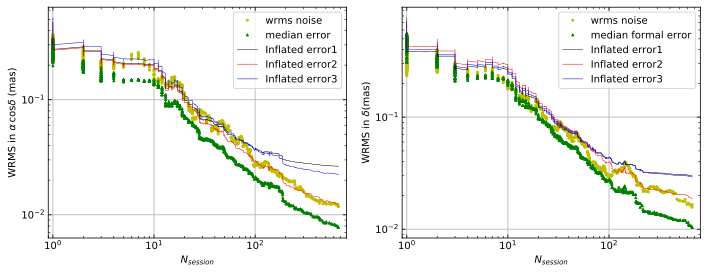

In [6]:
# wrms difference VS median formal uncertainty (Log-plot)
fig, (ax0, ax1) = plt.subplots(figsize=(10, 4), ncols=2, sharex=True)

ax0.plot(ses_min_RA, dRAc_wrms, "yo", markersize=2, label="wrms noise")
ax0.plot(ses_min_RA, dRAc_err_med, "g^", markersize=2, label="median error")
ax0.plot(ses_min_RA, dRAc_err_inf1, "k", lw=0.5, label="Inflated error1")
ax0.plot(ses_min_RA, dRAc_err_inf2, "r", lw=0.5, label="Inflated error2")
ax0.plot(ses_min_RA, dRAc_err_inf3, "b", lw=0.5, label="Inflated error3")
ax1.plot(ses_min_Dec, dDec_wrms, "yo", markersize=2, label="wrms noise")
ax1.plot(ses_min_Dec, dDec_err_med, "g^", markersize=2, label="median formal error")
ax1.plot(ses_min_Dec, dDec_err_inf1, "k", lw=0.5, label="Inflated error1")
ax1.plot(ses_min_Dec, dDec_err_inf2, "r", lw=0.5, label="Inflated error2")
ax1.plot(ses_min_Dec, dDec_err_inf3, "b", lw=0.5, label="Inflated error3")

ax0.set_xscale("log")
ax0.set_xlabel("$N_{session}$")
ax0.set_yscale("log")
ax0.set_ylabel("WRMS in $\\alpha\\,\\cos\\delta$ (mas)")
ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
ax0.set_xlim([0.9, 800])
ax0.grid(True)
ax0.legend()

ax1.set_xscale("log")
ax1.set_xlabel("$N_{session}$")
ax1.set_yscale("log")
ax1.set_ylabel("WRMS in $\\delta$(mas)")
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.grid(True)
ax1.legend()

plt.tight_layout()
plt.subplots_adjust(hspace=0.1)